Final Project Submission¶
Please fill out:

Student name: GROUP 8 Christabel Atolwa - Chair, Sydney Mumbo, Chepkemoi Mercy, James Ndiritu, Nicholas Njubi, Zacheaus Nyaga
Student pace: part time
Scheduled project review date/time:
Instructor name: Samwel Jane/ Samwel G. Mwangi/ Everline Asiko/ Veronica Isiaho/ Mildred Jepkosgei
Blog post URL:

## 1. Project Overview
For this project, we used multiple linear regression modeling to analyze house sales in a northwestern county.

Problem Statement
Homeowners in Northwestern County are faced with the complex task of understanding the various elements that impact the pricing of their homes. There is a need for a user-friendly tool that simplifies this complexity, offering homeowners clear insights into the factors influencing house prices and how they can strategically make changes in their properties in order sell them at higher prices or rather reasonable prices in the market.

Data Understanding
This project uses the King County House Sales dataset, which can be found in kc_house_data.csv in the data folder in the GitHub repository. The description of the column names can be found in column_names.md in the same folder.



## 2. Reading and Understanding the Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import  pandas as pd

from sklearn import linear_model


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

## 3. Data Loading and Exploration

In [4]:
df=pd.read_csv(r'kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [7]:
# Number of rows and columns
df.shape

(21597, 21)

In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  int64  
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [10]:
df.dtypes

id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [11]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## 3. Data Cleaning

In [12]:
#Check for and drop any duplicates
df = df.drop_duplicates()
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [7]:
# Split the grade column
# Create two columns, one for the numerical value(grade_num)
# The second column for for the string value (grade_exp)
df[["grade_num", "grade_exp"]] = df["grade"].str.split(" ",1, expand=True)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_num,grade_exp
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,7,Average
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,7,Average
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,6,Low Average
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,7,Average
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,8,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,8,Good
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,8,Good
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,7,Average
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,8,Good


In [8]:
# Change grade_num data type to int
df['grade_num'] = df['grade_num'].astype(int)
#Create new column for numeric values of condition
df["condition_num"] = df["condition"].replace({'Poor': 0, 'Fair': 1, 'Average': 2, 'Good': 3,'Very Good':4})
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_num,grade_exp,condition_num
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1955,0.0,98178,47.5112,-122.257,1340,5650,7,Average,2
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,7,Average,2
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,1933,NaN,98028,47.7379,-122.233,2720,8062,6,Low Average,2
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1965,0.0,98136,47.5208,-122.393,1360,5000,7,Average,4
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1987,0.0,98074,47.6168,-122.045,1800,7503,8,Good,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,2009,0.0,98103,47.6993,-122.346,1530,1509,8,Good,2
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,2014,0.0,98146,47.5107,-122.362,1830,7200,8,Good,2
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,2009,0.0,98144,47.5944,-122.299,1020,2007,7,Average,2
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,2004,0.0,98027,47.5345,-122.069,1410,1287,8,Good,2


In [9]:
selected_cols = ['bedrooms', 'bathrooms', 'sqft_living','condition_num','price']
selected_data = df[selected_cols]
selected_data.isnull().sum()

bedrooms         0
bathrooms        0
sqft_living      0
condition_num    0
price            0
dtype: int64

## 4. Distribution of Data

#### Steps
Create scatter plots for all variables where X axis is the price variables.

Create a heatmap to check correlation between the variable

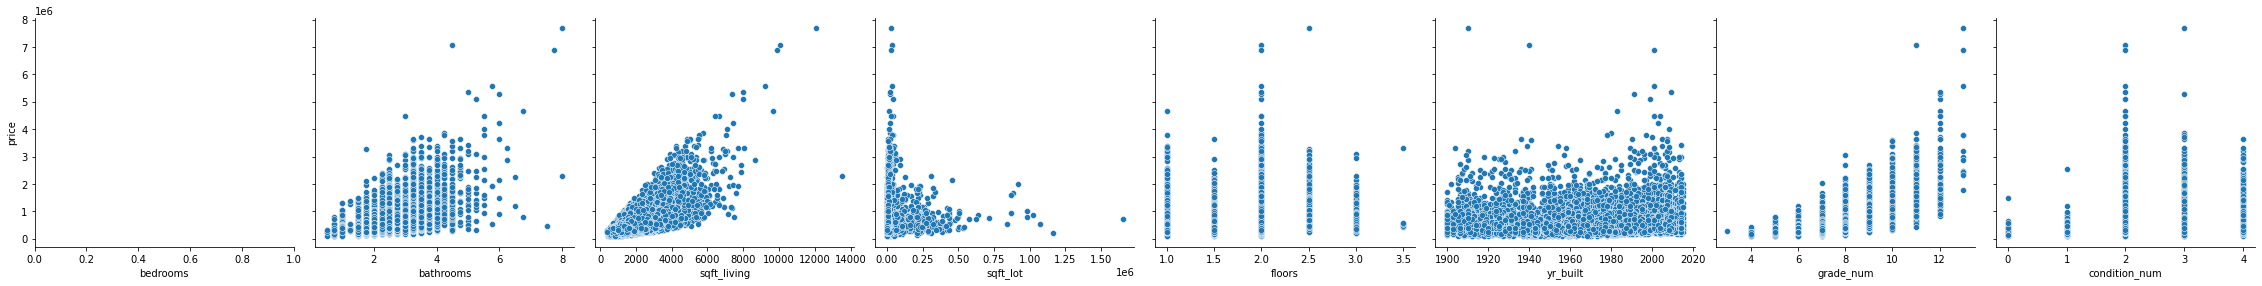

In [10]:
# Let's see how price is related with other variables using scatter plot.
sns.pairplot(df, x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built', 'grade_num', 'condition_num'], y_vars='price', height=4, aspect=1, kind='scatter')
plt.show()

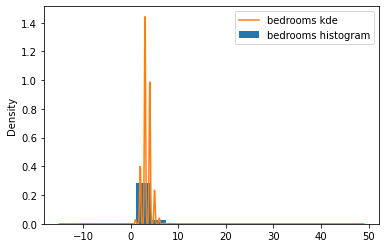

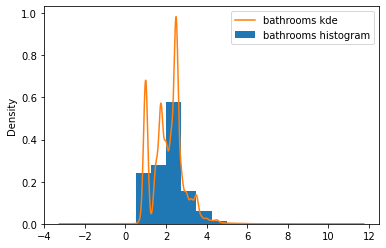

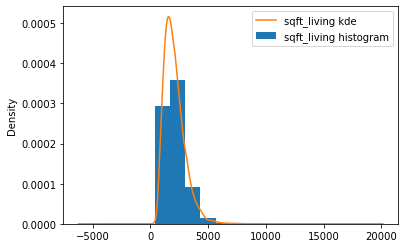

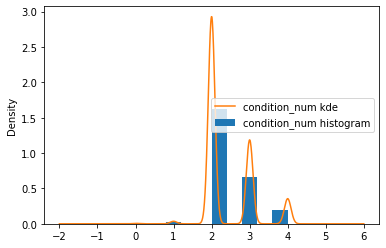

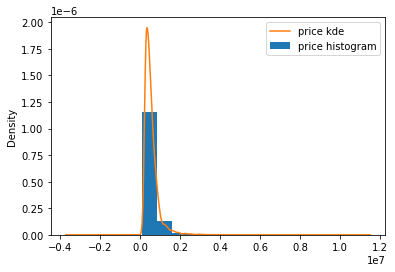

In [11]:
for column in selected_data:
    selected_data[column].plot.hist(density=True, label = column+' histogram')
    selected_data[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

From the diagrams,the variables selected do not have a perfect normal distribution.

### Checking Linearity

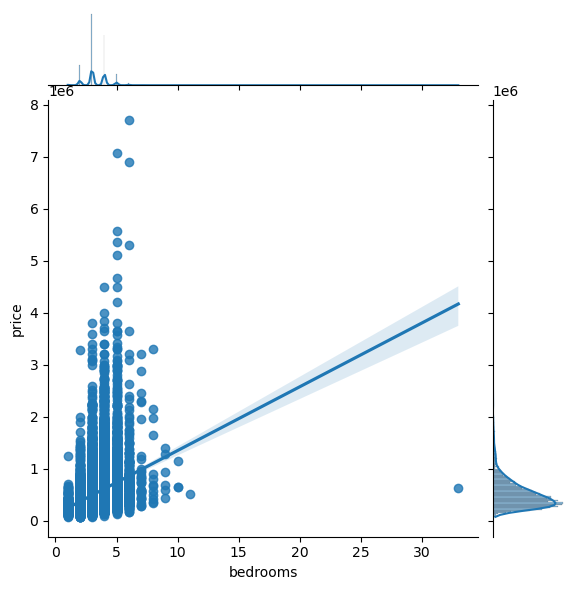

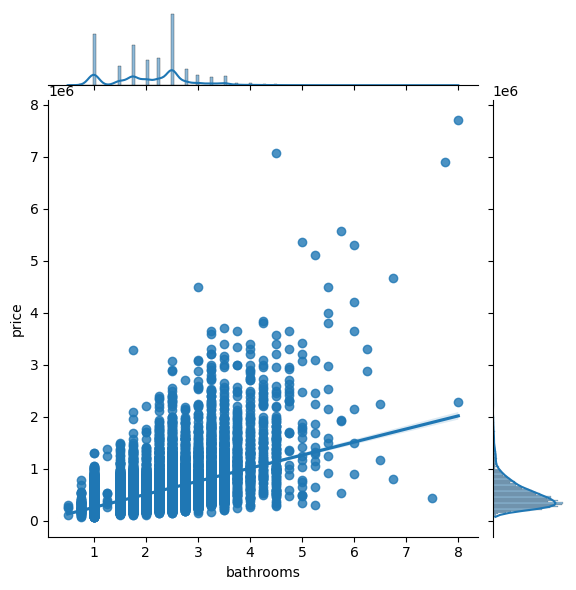

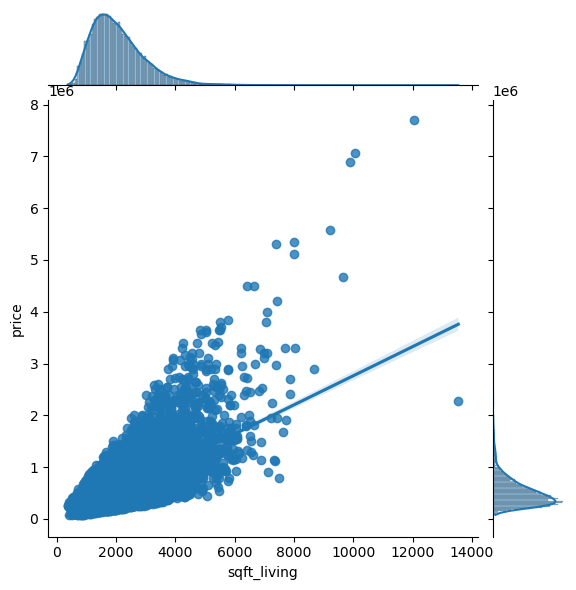

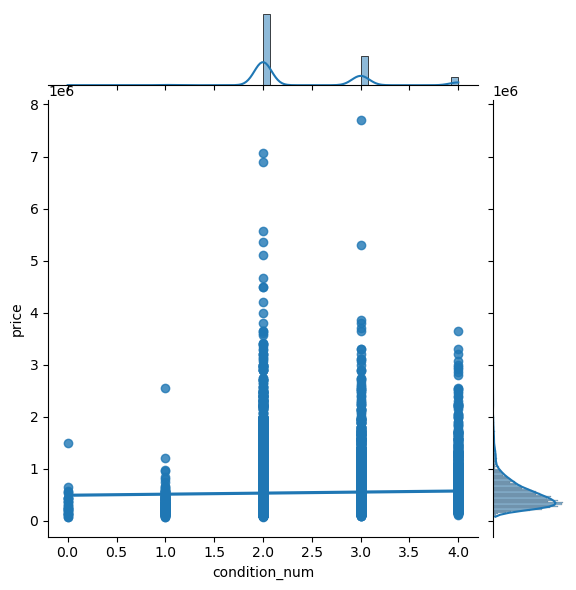

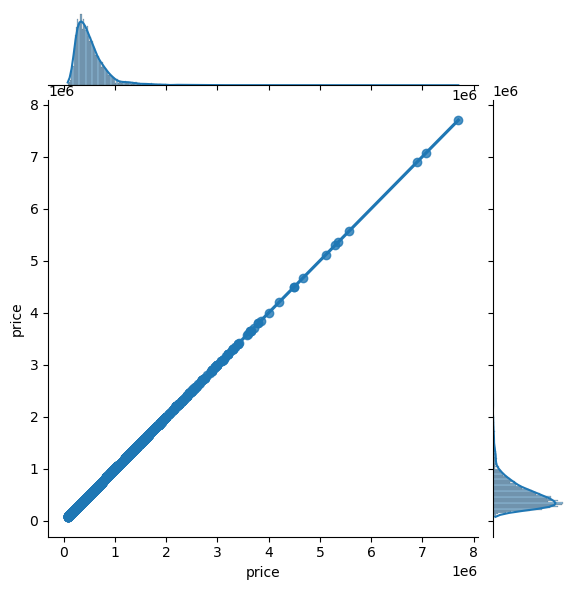

In [34]:
for column in selected_data.columns:
    # Create a jointplot for each column against 'price'
    sns.jointplot(x=column, y='price', data=selected_data, kind='reg')
    plt.show()

There is an observation of linearity however,alot is concentrated at one point.
Sqft_living ,bedroom and bathrooms have a good linear relationship with price.

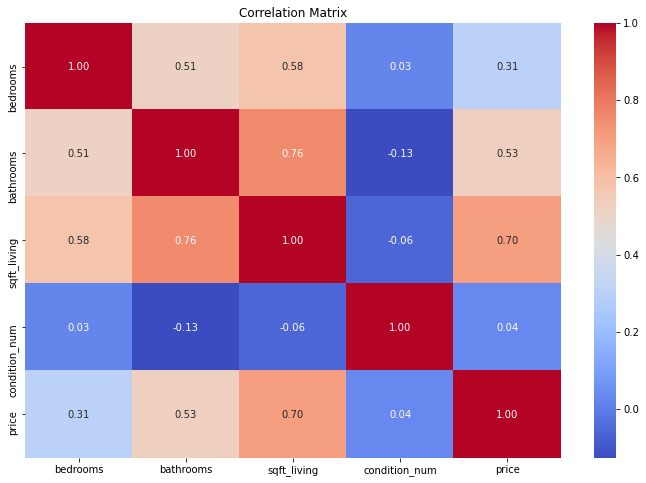

In [12]:
# Explore relationships between features using a correlation matrix
correlation_matrix = selected_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

From the plots above we can see that price variable has a strong correlation with the following variable and sqft_living.

## 5.Data Modelling

### a) Simple Linear Regression

In [46]:
#assigning X and Y variables
X= df['sqft_living']
y= df['price']

# TRAIN TEST SPLIT

X_train, X_test, y_train, y_test= train_test_split( X, y, train_size=0.7, test_size=0.3, random_state=100)

#Displaying part of the X_train and y_train values 
X_train.head()

8816     2030
15679    2050
3091     2060
4410     2150
14938     820
Name: sqft_living, dtype: int64

In [14]:
y_train.head()


8816     588000.0
15679    645000.0
3091     348000.0
4410     335000.0
14938    295000.0
Name: price, dtype: float64

In [47]:
import statsmodels.api as sm
#add a constant to your X_train model manually in order to get your intercept

X_train_sm = sm.add_constant(X_train)

#fit the regression line using Ordinary Least Squares (OLS)

lr = sm.OLS(y_train, X_train_sm).fit()


lr.params #to print the intercept, and the slope of the regression line fitted

const         -33413.976324
sqft_living      276.032468
dtype: float64

In [66]:
lr.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                 1.475e+04
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:34:42   Log-Likelihood:            -2.0973e+05
No. Observations:               15117   AIC:                         4.195e+05
Df Residuals:                   15115   BIC:                         4.195e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.341e+04   5182.680     -6.447      0.000   -4.36e+04   -2.33e+04
sqft_living   276.0325      2.273    121.436      0.000     271.577     280.488
==============================================================================
Omnibus:                     9057.805   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           192163.580
Skew:                           2.483   Prob(JB):                         0.00
Kurtosis:                      19.746   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
x = {'sqft_living' : 2}
x = pd.DataFrame (x,index = [0])
X_new = sm.add_constant(x)
lr.predict (X_new)
l

ValueError: shapes (1,1) and (2,) not aligned: 1 (dim 1) != 2 (dim 0)

### b) Multiple linear Regression Model

In [17]:
# Selecting features and target variable
X = df[['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms', 'bedrooms', 'lat', 'condition_num']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train_sm = sm.add_constant(X_train)

# Fitting the model
model = sm.OLS(y_train, X_train_sm).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     3590.
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:08:50   Log-Likelihood:            -2.3822e+05
No. Observations:               17277   AIC:                         4.765e+05
Df Residuals:                   17269   BIC:                         4.765e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -3.35e+07   6.22e+05    -53.847      0.000   -3.47e+07   -3.23e+07
sqft_living     261.4690      5.126     51.009      0.000     251.422     271.516
sqft_above       -0.9036      4.759     -0.190      0.849     -10.232       8.425
sqft_living15    66.4584      4.148     16.021      0.000      58.328      74.589
bathrooms      2.238e+04   3663.675      6.110      0.000    1.52e+04    2.96e+04
bedrooms      -5.756e+04   2511.700    -22.918      0.000   -6.25e+04   -5.26e+04
lat            7.017e+05   1.31e+04     53.678      0.000    6.76e+05    7.27e+05
condition_num  5.884e+04   2856.295     20.601      0.000    5.32e+04    6.44e+04
==============================================================================
Omnibus:                    13762.696   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           765544.149
Skew:                           3.402   Prob(JB):                         0.00
Kurtosis:                      34.893   Cond. No.                     1.26e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# Predicting on the test set
X_test_sm = sm.add_constant(X_test)
y_pred = model.predict(X_test_sm)

# Calculate R-squared and RMSE
r_squared = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'R-squared: {r_squared}')
print(f'RMSE: {rmse}')

R-squared: 0.5867375861685376
RMSE: 231977.35717052015


In [20]:
# Example: Creating an interaction term
df['living_condition_interaction'] = df['sqft_living'] * df['condition_num']

# Adding this new feature to the model
X_interact = df[['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms', 'bedrooms', 'lat', 'condition_num', 'living_condition_interaction']]
X_train, X_test, y_train, y_test = train_test_split(X_interact, y, test_size=0.2, random_state=42)

X_train_sm = sm.add_constant(X_train)
model_interact = sm.OLS(y_train, X_train_sm).fit()
print(model_interact.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     3203.
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:09:15   Log-Likelihood:            -2.3812e+05
No. Observations:               17277   AIC:                         4.763e+05
Df Residuals:                   17268   BIC:                         4.763e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [21]:
# Creating interaction terms
df['living_bathrooms_interaction'] = df['sqft_living'] * df['bathrooms']
df['bedrooms_above_interaction'] = df['bedrooms'] * df['sqft_above']

# Adding these new features to the model
X_interact2 = df[['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms', 
                 'bedrooms', 'lat', 'condition_num', 
                 'living_condition_interaction', 'living_bathrooms_interaction', 
                 'bedrooms_above_interaction']]

X_train, X_test, y_train, y_test = train_test_split(X_interact2, y, test_size=0.2, random_state=42)

X_train_sm = sm.add_constant(X_train)
model_interact2 = sm.OLS(y_train, X_train_sm).fit()
print(model_interact2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     3053.
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:09:23   Log-Likelihood:            -2.3718e+05
No. Observations:               17277   AIC:                         4.744e+05
Df Residuals:                   17266   BIC:                         4.745e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Calculate VIF for the features
vif = calculate_vif(X_train)
print(vif)

                        feature         VIF
0                   sqft_living  225.787727
1                    sqft_above  162.871591
2                 sqft_living15   24.312257
3                     bathrooms   44.976344
4                      bedrooms  117.761746
5                           lat  154.337388
6                 condition_num   93.158538
7  living_condition_interaction   99.362559
8  living_bathrooms_interaction   46.177216
9    bedrooms_above_interaction  139.128956


In [75]:
# Removing 'sqft_above' and using interaction terms
X_refined = df[['sqft_living', 'sqft_living15', 'bathrooms', 'bedrooms', 
                'lat', 'condition_num', 'living_condition_interaction', 
                'living_bathrooms_interaction', 'bedrooms_above_interaction']]

# Splitting the data again
X_train_refined, X_test_refined, y_train, y_test = train_test_split(X_refined, y, test_size=0.2, random_state=42)

In [76]:
X_train_final = sm.add_constant(X_train_refined)
model_final = sm.OLS(y_train, X_train_final).fit()
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     3387.
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        17:13:59   Log-Likelihood:            -2.3719e+05
No. Observations:               17277   AIC:                         4.744e+05
Df Residuals:                   17267   BIC:                         4.745e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -3.205e+07   5.86e+05    -54.709      0.000   -3.32e+07   -3.09e+07
sqft_living                    -85.5062      9.918     -8.621      0.000    -104.947     -66.065
sqft_living15                   96.7773      3.942     24.550      0.000      89.051     104.504
bathrooms                    -9.778e+04   4474.641    -21.852      0.000   -1.07e+05    -8.9e+04
bedrooms                     -3.982e+04   3023.245    -13.172      0.000   -4.57e+04   -3.39e+04
lat                           6.823e+05   1.23e+04     55.497      0.000    6.58e+05    7.06e+05
condition_num                -5.637e+04   6515.358     -8.651      0.000   -6.91e+04   -4.36e+04
living_condition_interaction    58.2109      2.987     19.486      0.000      52.355      64.066
living_bathrooms_interaction    62.1736      1.483     41.924      0.000      59.267      65.081
bedrooms_above_interaction       0.3315      1.079      0.307      0.759      -1.784       2.447
==============================================================================
Omnibus:                     9311.884   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           583489.837
Skew:                           1.801   Prob(JB):                         0.00
Kurtosis:                      31.241   Cond. No.                     4.01e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
# Making predictions on the test set
X_test_final = sm.add_constant(X_test_refined)
y_pred_final = model_final.predict(X_test_final)
print (X_test_refined, y_pred_final)

# Calculate R-squared and RMSE for the final model
# r_squared_final = r2_score(y_test, y_pred_final)
# rmse_final = mean_squared_error(y_test, y_pred_final, squared=False)

# print(f'Final Model R-squared: {r_squared_final}')
# print(f'Final Model RMSE: {rmse_final}')

       sqft_living  sqft_living15  bathrooms  bedrooms      lat  \
3686           850            850       0.75         3  47.5030   
10247         1510           1510       1.00         3  47.6966   
4037          1790           2060       2.25         4  47.4819   
3437          1140           1500       1.50         2  47.5707   
19291         1500           1640       1.00         3  47.6718   
...            ...            ...        ...       ...      ...   
2522          1020           1200       1.00         2  47.3010   
11119         2050           2140       2.50         3  47.4808   
11973         2120           2120       2.00         5  47.4558   
17601         1990           1900       2.50         3  47.2908   
19844         1590           1390       2.00         4  47.5400   

       condition_num  living_condition_interaction  \
3686               2                          1700   
10247              3                          4530   
4037               2             

In [104]:

group8_data = {'sqft_living':850, 'sqft_living15':850,'bathrooms': 0.75, 'bedrooms': 3,'lat': 47.5030,'condition_num': 2,'living_condition_interaction': 1700,'living_bathrooms_interaction': 637.5,'bedrooms_above_interaction': 1800}
# Convert new data to a DataFrame
group8_data = pd.DataFrame(group8_data,index=[0])
#print (group8_data)
print(group8_data.columns)
group8_data_with_const = sm.add_constant(group8_data)
# Check the shape of the new data
print(group8_data_with_const.shape)
    predictions = model_final.predict(group8_data_with_const)
predictions


Index(['sqft_living', 'sqft_living15', 'bathrooms', 'bedrooms', 'lat',
       'condition_num', 'living_condition_interaction',
       'living_bathrooms_interaction', 'bedrooms_above_interaction'],
      dtype='object')
(1, 9)


ValueError: shapes (1,9) and (10,) not aligned: 9 (dim 1) != 10 (dim 0)

Discussion of the Final Regression Model After several iterations and refinements, our final regression model has been optimized to provide a more accurate and insightful understanding of the factors influencing house prices. In this final iteration, we addressed the issue of multicollinearity, which was evident in our initial models. Specifically, we removed the 'sqft_above' feature due to its high correlation with other variables, particularly 'sqft_living'. This step was crucial to enhance the stability and reliability of our model.

The final model includes key features such as 'sqft_living', 'sqft_living15', 'bathrooms', 'bedrooms', and 'lat', along with the 'condition_encoded' variable. Notably, we incorporated interaction terms like 'living_condition_interaction', 'living_bathrooms_interaction', and 'bedrooms_above_interaction'. These terms allowed us to capture the combined effects of certain features on house prices, providing a significant view of how different aspects of a property interact to influence its value. For instance, the interaction between living area and house condition revealed that larger homes in better condition command significantly higher prices.

Our final model demonstrated an improved fit, as indicated by a higher R-squared value compared to the initial model. This improvement suggests that our model is now better equipped to explain the variability in house prices. However, it's essential to acknowledge that no model can capture the full complexity of real estate pricing, and certain factors outside the scope of our dataset may also play a significant role.

In conclusion, the final regression model offers valuable insights for stakeholders in the real estate market. While it should be used as a guide rather than a definitive predictor, it serves as a robust tool for understanding key trends and relationships in the housing market. The model's findings can assist realtors in making informed decisions by highlighting the property features that are most impactful on prices.